In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from matplotlib.colors import LinearSegmentedColormap
import pickle 
fileObj = open('model2.obj', 'wb')

In [ ]:
derma_data = pd.read_csv("dermatology_database.csv")
features =["erythema","scaling","definite_borders","itching","koebner_phenomenon",
           "polygonal_papules","follicular_papules","oral_mucosal_involvement",
           "knee_and_elbow_involvement","scalp_involvement","family_history",
           "melanin_incontinence","eosinophils_infiltrate","PNL_infiltrate","fibrosis_papillary_dermis",
           "exocytosis","acanthosis","hyperkeratosis","parakeratosis","clubbing_rete_ridges","elongation_rete_ridges",
           "thinning_suprapapillary_epidermis","spongiform_pustule","munro_microabcess","focal_hypergranulosis",
           "disappearance_granular_layer","vacuolisation_damage_basal_layer","spongiosis","saw_tooth_appearance_retes",
           "follicular_horn_plug","perifollicular_parakeratosis","inflammatory_mononuclear_infiltrate","band_like_infiltrate","age"]
X = derma_data[features]
y = derma_data['class']

derma_data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   erythema                             358 non-null    int64
 1   scaling                              358 non-null    int64
 2   definite_borders                     358 non-null    int64
 3   itching                              358 non-null    int64
 4   koebner_phenomenon                   358 non-null    int64
 5   polygonal_papules                    358 non-null    int64
 6   follicular_papules                   358 non-null    int64
 7   oral_mucosal_involvement             358 non-null    int64
 8   knee_and_elbow_involvement           358 non-null    int64
 9   scalp_involvement                    358 non-null    int64
 10  family_history                       358 non-null    int64
 11  melanin_incontinence                 358 non-null    int64

<Axes: >

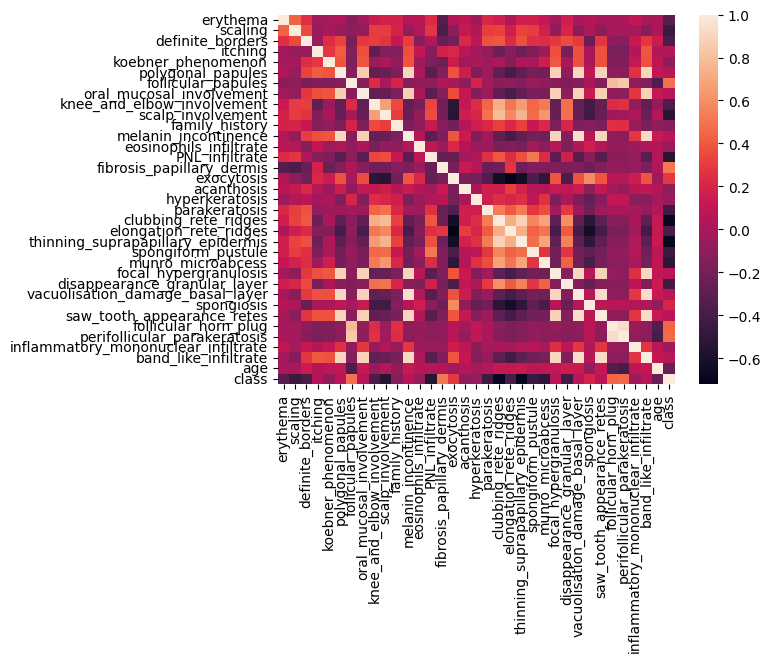

In [3]:
derma_data.info()
corr = derma_data.corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels=corr.columns.values)


In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Train the Logistic Regression model
model = LogisticRegression(multi_class='ovr', solver='saga', penalty='l2')
model.fit(X_train, y_train)

#save the model
pickle.dump(model,fileObj)
fileObj.close()

C:\Users\rigel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [7]:
#Evaluation

#retrieving the model using pickle
fileObj = open('model2.obj', 'rb')
model = pickle.load(fileObj)


In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 97.22%
Confusion Matrix:
 [[22  0  0  0  0  0]
 [ 0 12  0  2  0  0]
 [ 0  0 14  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 12  0]
 [ 0  0  0  0  0  2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        22
           2       1.00      0.86      0.92        14
           3       1.00      1.00      1.00        14
           4       0.80      1.00      0.89         8
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00         2

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.98      0.97      0.97        72



In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

Accuracy: 97.22%
Precision: 0.98
Recall: 0.97
F1-score: 0.97


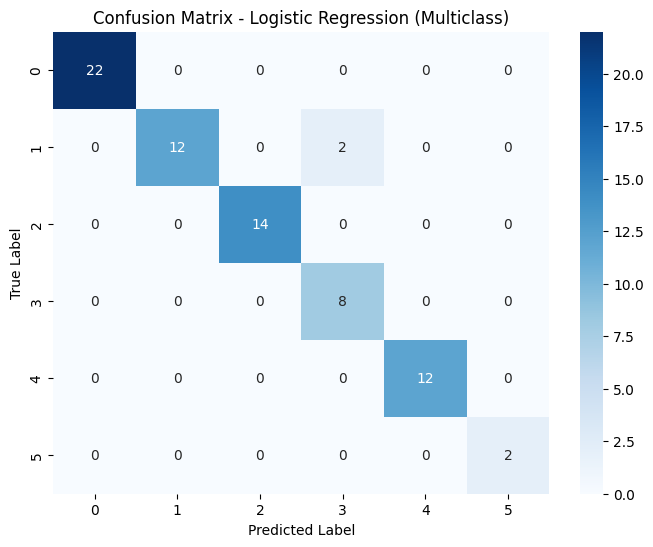

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression (Multiclass)')
plt.show()